## EDA

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [168]:
train_dataset = pd.read_csv('data/train.csv')
test_dataset = pd.read_csv('data/test.csv')

In [14]:
def Basic_Overview(train_set, test_set):
    print(30 * '=' + ' TRAIN / HEAD ' + 30 * '=')
    print(train_set.head(5))

    print(30 * '=' + ' TRAIN / INFO ' + 30 * '=')
    print(train_set.info())

    print(30 * '=' + ' TRAIN / DESCRIBE ' + 30 * '=')
    print(train_set.describe())

    print(30 * '=' + ' TEST / HEAD ' + 30 * '=')
    print(test_set.head(5))

    print(30 * '=' + ' TEST / INFO ' + 30 * '=')
    print(test_set.info())

    print(30 * '=' + ' TEST / DESCRIBE ' + 30 * '=')
    print(test_set.describe())

In [26]:
Basic_Overview(train_dataset, test_dataset)

============================== TRAIN / HEAD ==============================
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.10

In [32]:
print(train_dataset.columns)
print(test_dataset.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [83]:
to_drop = ['Survived']

numerical_cols = [col for col in train_dataset.select_dtypes(include=[np.number]).columns 
                  if col not in to_drop]

categorical_cols = [col for col in train_dataset.select_dtypes(include=["object", "category", "bool"]).columns 
                    if col not in to_drop]

print(numerical_cols)
print(categorical_cols)

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### EDA Function

In [47]:
def HistPlot(data: pd.DataFrame, num_cols: list):
    plt.figure(figsize=(15, 10))

    # Vẽ histogram cho từng cột
    for i, col in enumerate(num_cols, 1): #start = 1
        plt.subplot(3, 3, i)  # Tùy số lượng cột mà chia subplot
        sns.histplot(data[col], 
                     stat = 'count', # Count: số lượng mẫu/ Density: Mật độ (chuẩn hóa)
                     kde=True,  # Đường phân phối
                     bins=30)   # Số cột (Độ rộng của từng cột). Càng nhỏ thì cột càng to
        plt.title(f'Distribution of {col}', fontsize=12)
        plt.xlabel(col)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

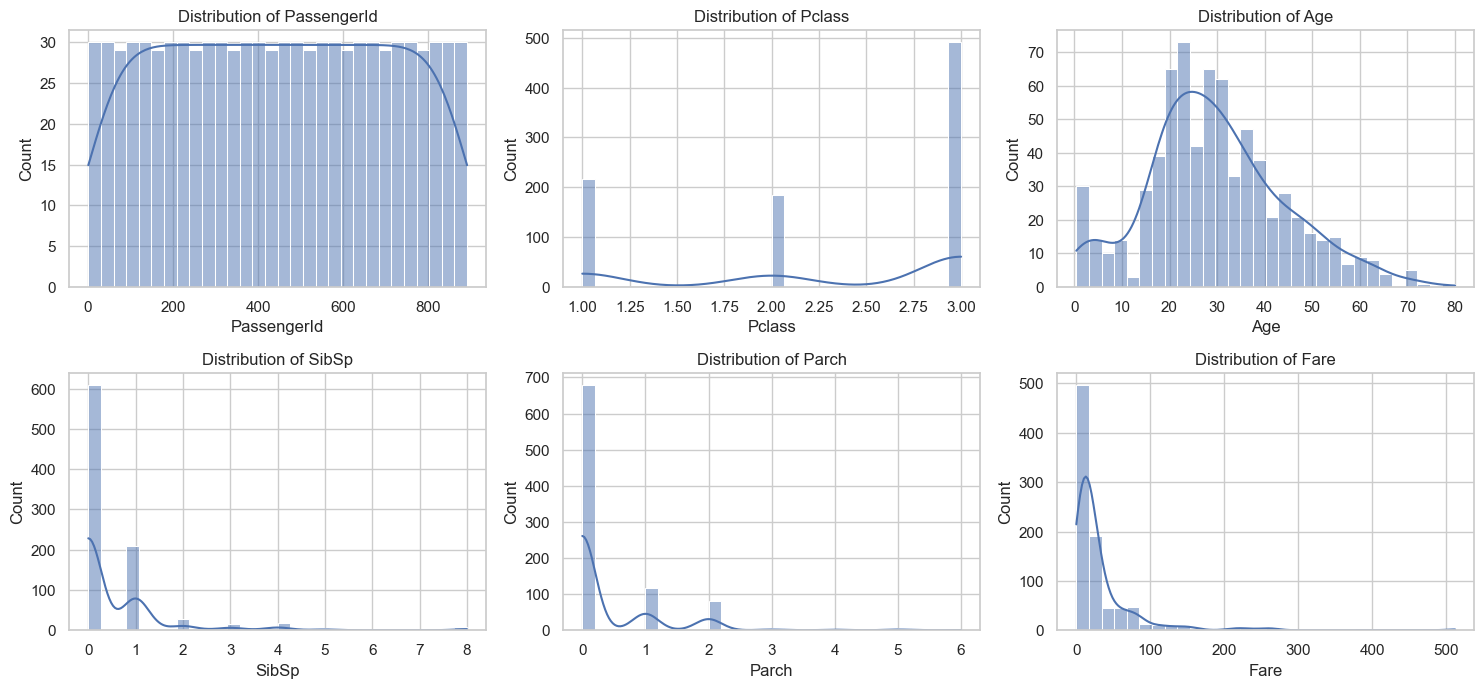

In [48]:
HistPlot(train_dataset, numerical_cols)

In [ ]:
def BoxPlot(data, num_cols):
    plt.figure(figsize = (15, 15))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(3, 3, i)
        #sns.boxplot(y = data[col])
        sns.boxplot(x=train_dataset['Survived'], y=train_dataset[col]) #Theo doi tren cac label
        plt.title(col, fontsize = 12)
        plt.xlabel(' ') # Không cần nhãn trục x
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()

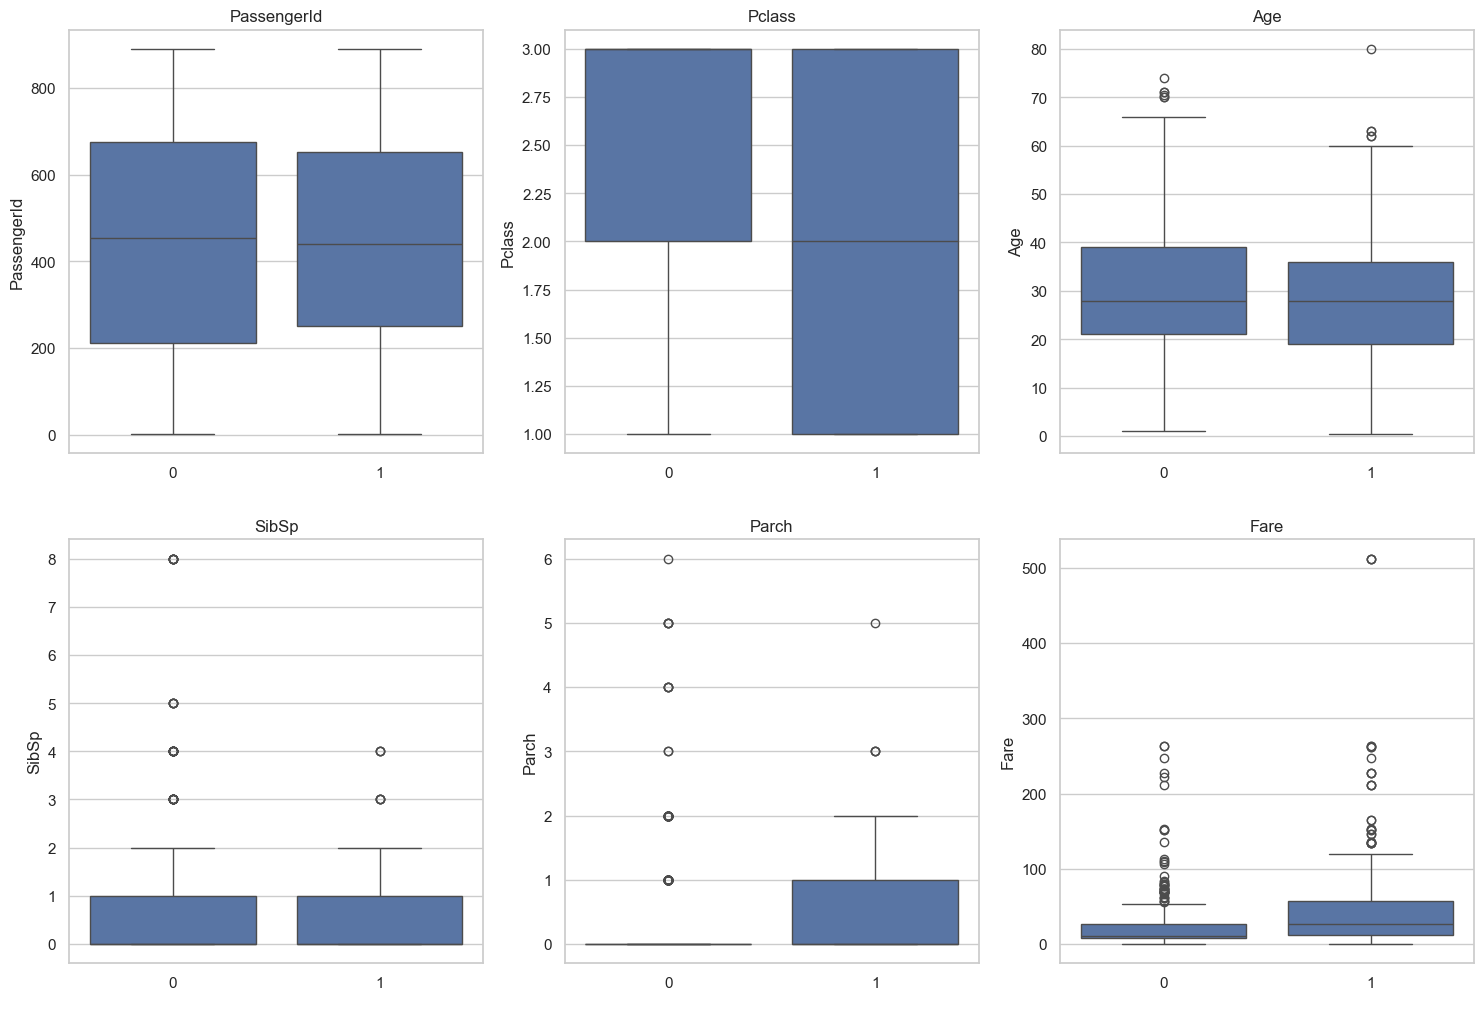

In [58]:
BoxPlot(train_dataset, numerical_cols)

In [61]:
def Cat_Distribution(data, cat_cols):
    for col in cat_cols:
        vc = data[col].value_counts(dropna = False) # dropna = False -> không bỏ qua giá trị NaN khi đếm
        pct = data[col].value_counts(normalize = True, dropna = False) * 100
        cat_summary = (
                pd.DataFrame({"count": vc, "percent": pct.round(2)})
                .sort_values("count", ascending=False)
            )
        
        print(f"FEATURE: {col}")
        display(cat_summary.head(20))

In [62]:
Cat_Distribution(train_dataset, categorical_cols)

FEATURE: Name


,count,percent
Name,,
"Braund, Mr. Owen Harris",1,0.11
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,0.11
"Heikkinen, Miss. Laina",1,0.11
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.11
"Allen, Mr. William Henry",1,0.11
"Moran, Mr. James",1,0.11
"McCarthy, Mr. Timothy J",1,0.11
"Palsson, Master. Gosta Leonard",1,0.11
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,0.11


FEATURE: Sex


,count,percent
Sex,,
male,577,64.76
female,314,35.24


FEATURE: Ticket


,count,percent
Ticket,,
347082,7,0.79
1601,7,0.79
CA. 2343,7,0.79
3101295,6,0.67
CA 2144,6,0.67
347088,6,0.67
382652,5,0.56
S.O.C. 14879,5,0.56
113760,4,0.45


FEATURE: Cabin


,count,percent
Cabin,,
NaN,687,77.10
G6,4,0.45
C23 C25 C27,4,0.45
B96 B98,4,0.45
F2,3,0.34
D,3,0.34
E101,3,0.34
C22 C26,3,0.34
F33,3,0.34


FEATURE: Embarked


,count,percent
Embarked,,
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [68]:
def Corr_Matrix(data, num_cols):
    corr_matrix = data[num_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr_matrix, 
        annot=True,        # Hiện chỉ số trên từng ô
        fmt=".2f",         # Làm tròn 2 chữ số thập phân
        #cmap="coolwarm",   # Thang màu dễ nhìn (âm → dương)
        linewidths=0.5,    # Viền giữa các ô
        cbar_kws={'label': 'Correlation Coefficient'}  # Nhãn thanh màu
    )
    plt.title("Correlation Matrix of Numerical Features", fontsize=14)
    plt.tight_layout()
    plt.show()

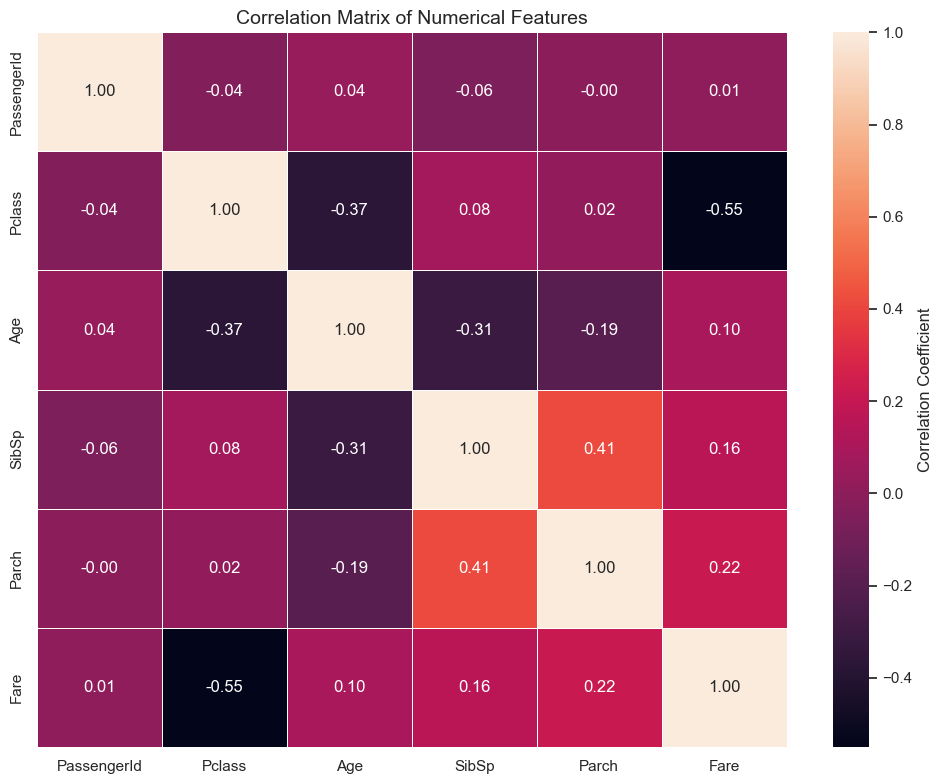

In [69]:
Corr_Matrix(train_dataset, numerical_cols)

In [72]:
def Corr_Compare(trainset, testset, label):
    # Tính tương quan với label
    corr_train = trainset.corr(numeric_only = True)[label]
    corr_test = testset.corr(numeric_only = True)[label]

    corr_compare = pd.DataFrame({
        'Feature': corr_train.index, 
        'Train': corr_train.values, 
        'Test': corr_test.values
    })

    plt.figure(figsize = (16, 12))
    # corr_melt = corr_compare.melt(
    # id_vars="Feature",                # giữ nguyên cột Feature (không melt)
    # value_vars=["Train", "Test"],     # các cột cần melt (sẽ được gom lại)
    # var_name="Dataset",               # tên cột mới chứa tên cột gốc ("Train"/"Test")
    # value_name="Correlation"          # tên cột mới chứa giá trị tương ứng
    # )       
    # sns.barplot(data = corr_melt, x = 'Correlation', y = 'Feature', hue = 'Dataset')

    corr_compare.plot(kind = 'bar', x = 'Feature')
    plt.title("Comparison of Feature Correlation with Label (Train vs Test)")
    plt.xlabel("Correlation with Label")
    plt.ylabel("Features")
    plt.legend(title="Dataset", labels = ['Train', 'Test'])
    plt.show()

In [ ]:
Corr_Compare(train_dataset, test_dataset)

In [80]:
def Corr_Rank(data, columns):
    for cols in columns:
        corr_label = data.corr(numeric_only = True)[cols].sort_values(ascending = False)

        plt.figure(figsize = (3, 5))
        sns.heatmap(corr_label.to_frame(),
                    annot = True,
                    cmap = 'coolwarm',
                    fmt = '.2f',
                    cbar = 'False')
        plt.title(f'Correlation with {cols}', fontsize = 14)
        plt.show

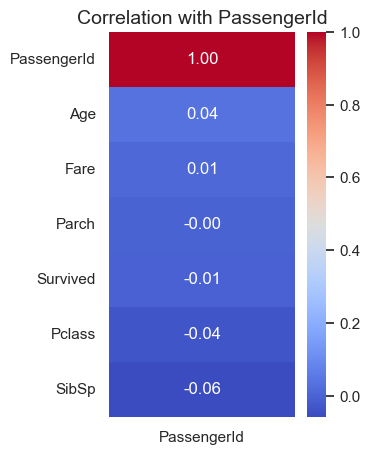

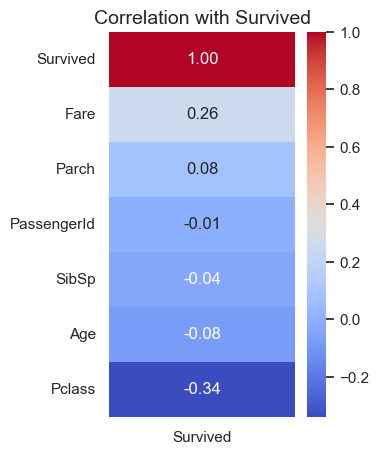

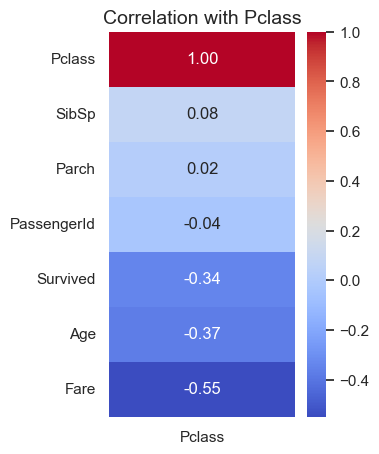

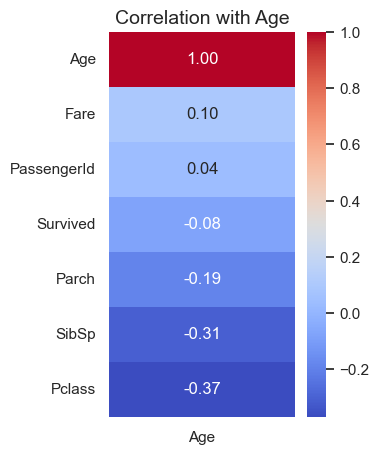

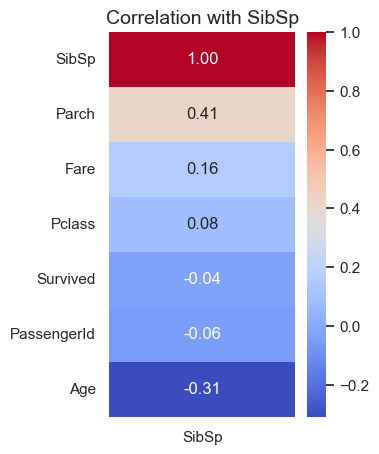

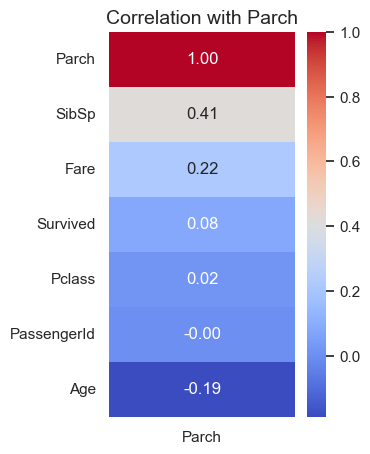

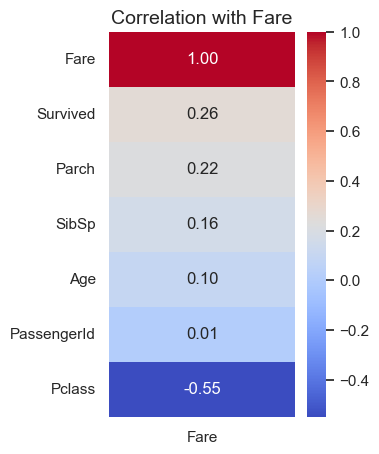

In [93]:
no_cat = [col for col in train_dataset.select_dtypes(include = [np.number]).columns]
Corr_Rank(train_dataset, no_cat)

In [96]:
def PairPlot(data, cols, label):
    sns.pairplot(data,
                 hue = label,
                 vars = cols,
                 corner = True, # Chỉ vẽ nửa dưới
                 plot_kws = dict(alpha = 0.6, s = 25) # s là kích thước điểm trong scatterplot, số càng lớn điểm càng to
                 )
    plt.show()

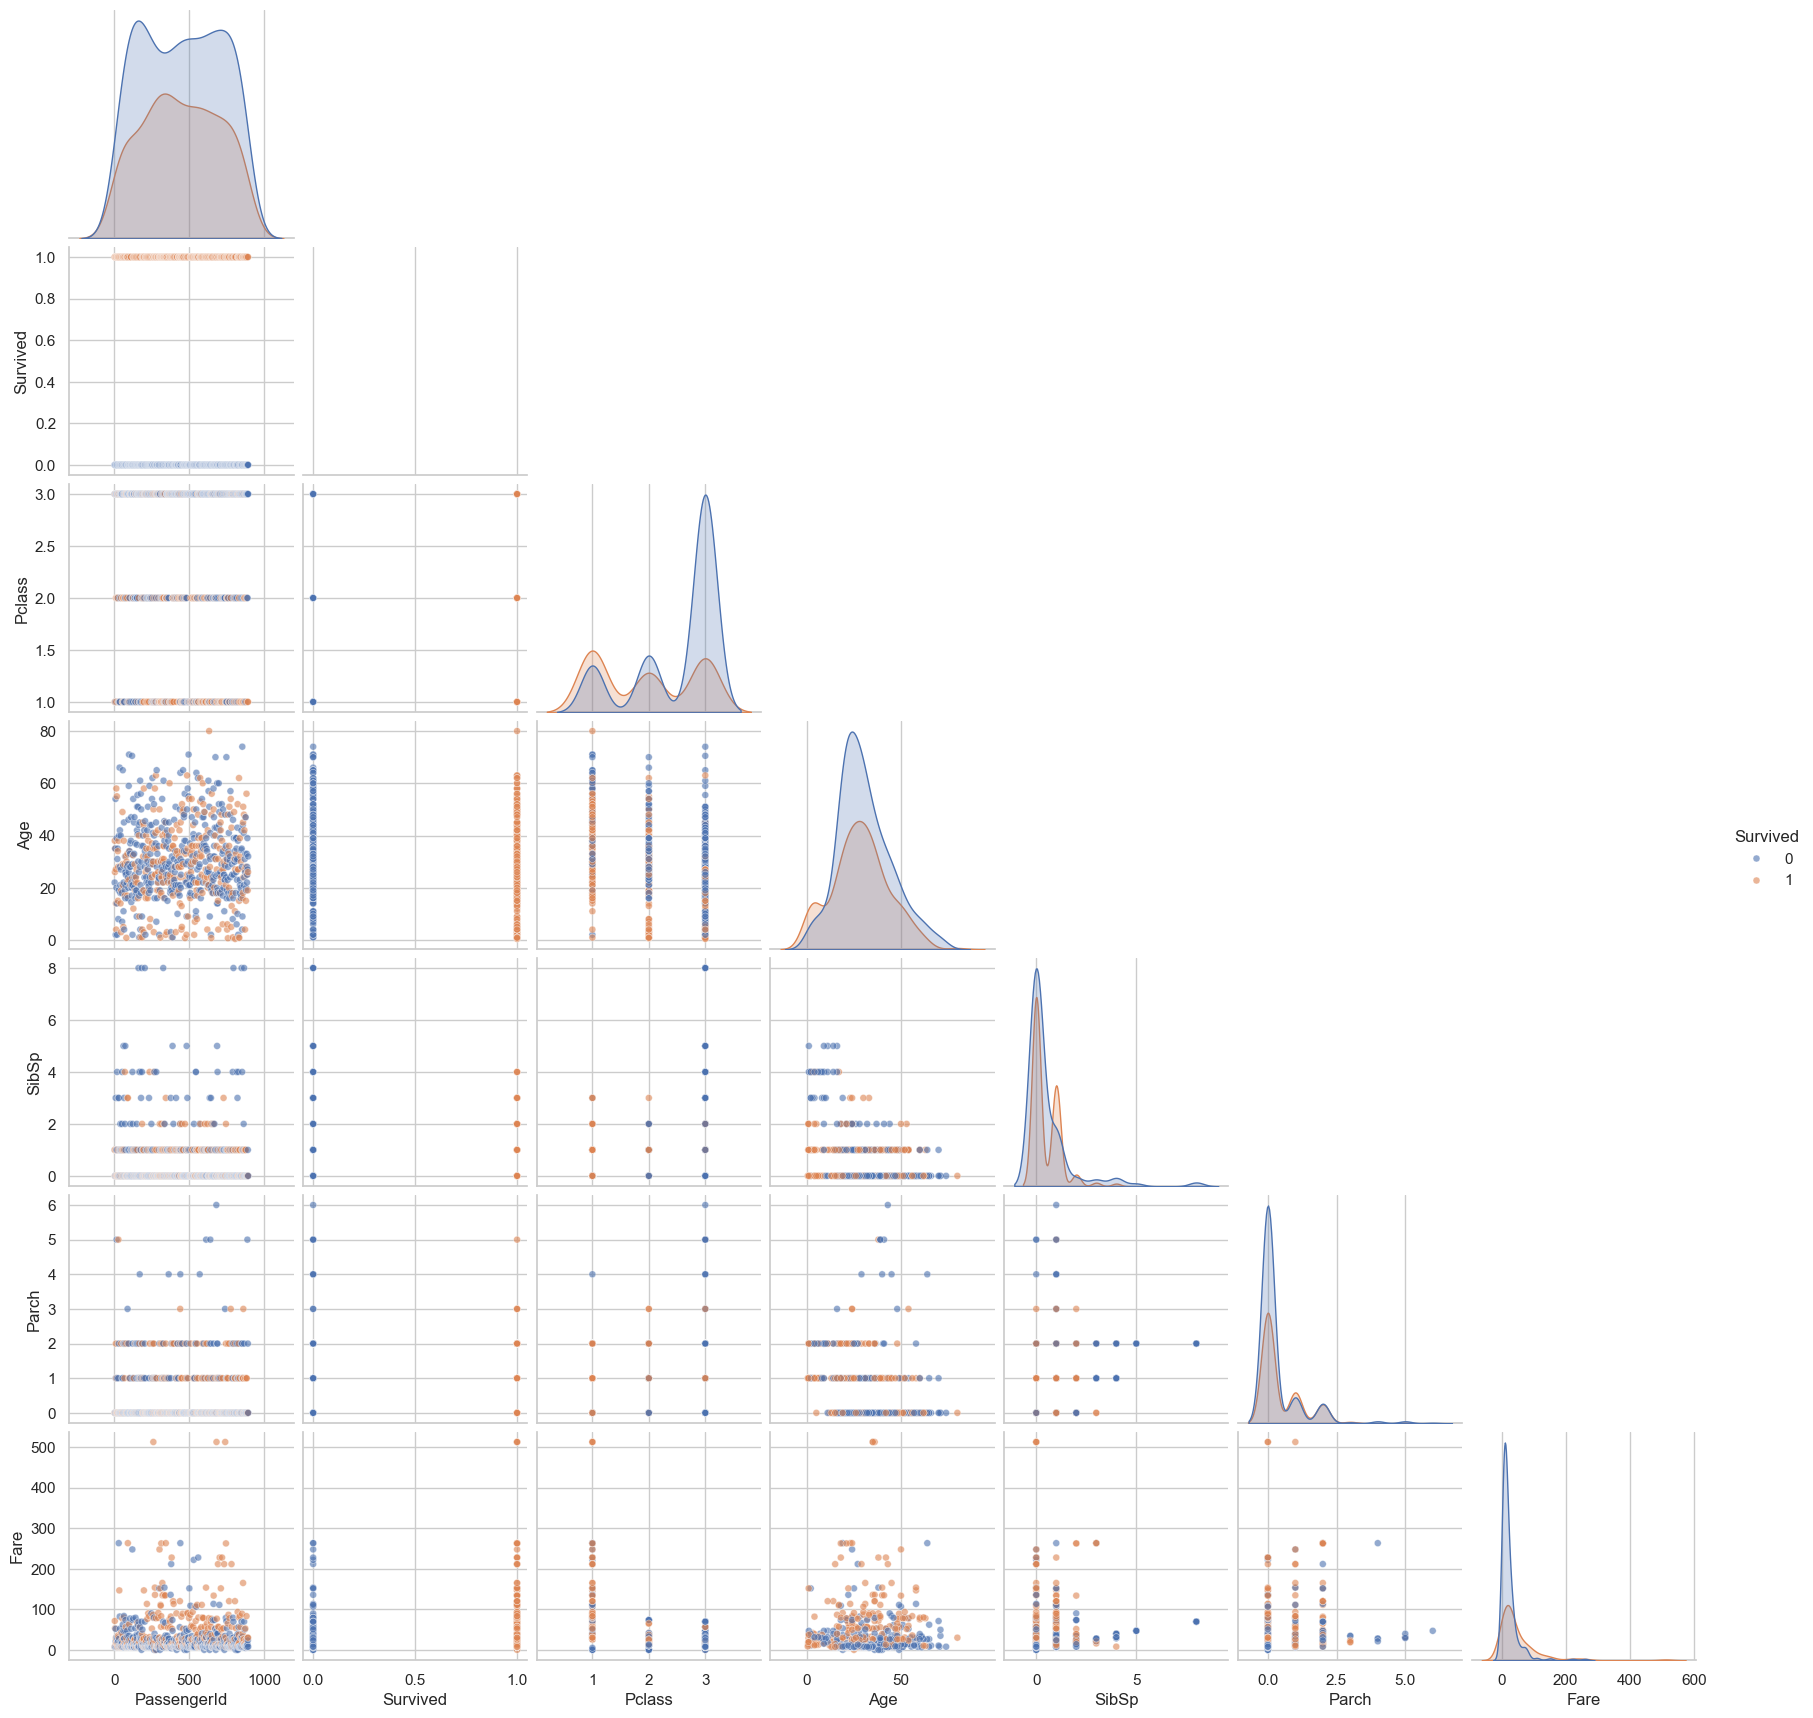

In [98]:
PairPlot(train_dataset, no_cat, 'Survived')

In [ ]:
def Label_Distribution(data, label):
    plt.figure(figsize = (12, 6))
    ax = sns.countplot(
        data = data, 
        x = label,
        order = data[label].value_counts().index, # xác định thứ tự sắp xếp các cột (category) trên trục X.
        palette = 'tab20'
    )

    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2., #Góc trái dưới (mõi cột) + chiều rộng / 2 
            height,
            f'{int(height)}',
            ha = 'center'
        )
    plt.title('Label Distribution')
    plt.tight_layout()
    plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_24936\1064799206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


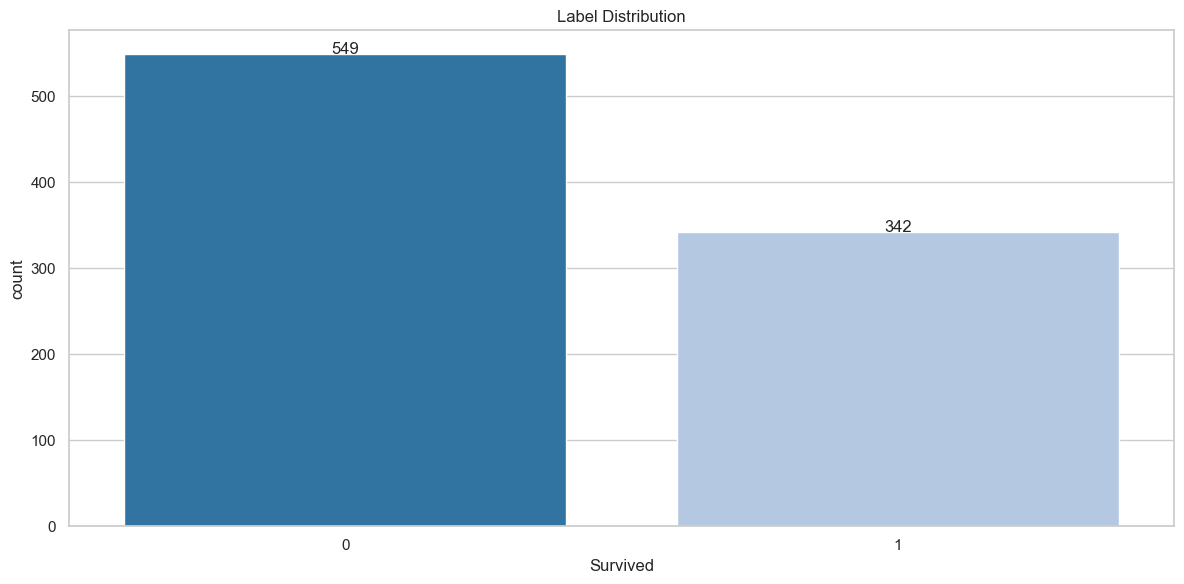

In [109]:
Label_Distribution(train_dataset, 'Survived')

### Further Test

In [125]:
women = train_dataset.loc[train_dataset.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [126]:
men = train_dataset.loc[train_dataset.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


## CODE

In [169]:
n_sample_train = train_dataset.shape[0]
n_sample_test = test_dataset.shape[0]

x = train_dataset.drop(['Survived', 'PassengerId', 'Cabin', 'Ticket'], axis = 1)
y = train_dataset['Survived']

test_IDs = test_dataset['PassengerId'].copy() #Dùng copy để tạo bản sao của series, giữ nguyên index và tên cột để ghép lại kết quả về sau
test_dataset = test_dataset.drop(['PassengerId', 'Cabin', 'Ticket'], axis = 1)

In [170]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x, y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

In [171]:
display(x_train)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
692,3,"Lam, Mr. Ali",male,NaN,0,0,56.4958,S
481,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,0.0000,S
527,1,"Farthing, Mr. John",male,NaN,0,0,221.7792,S
855,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,9.3500,S
801,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,26.2500,S
...,...,...,...,...,...,...,...,...
359,3,"Mockler, Miss. Helen Mary ""Ellie""",female,NaN,0,0,7.8792,Q
258,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,C
736,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,34.3750,S
462,1,"Gee, Mr. Arthur H",male,47.0,0,0,38.5000,S


### Preprocessing

In [172]:
#fillna


In [173]:
null_vals = train_dataset.isna().sum().sort_values(ascending=False)
print("Train:")
print(null_vals[null_vals > 0 ])

print("------")

null_vals = test_dataset.isna().sum().sort_values(ascending=False)
print("Test:")
print(null_vals[null_vals > 0 ])

Train:
Cabin       687
Age         177
Embarked      2
dtype: int64
------
Test:
Age     86
Fare     1
dtype: int64


In [174]:
null_vals = x_train.isna().sum().sort_values(ascending = False)
null_vals

Age         137
Embarked      2
Name          0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [175]:
null_vals[null_vals > 0]

for col in null_vals[(null_vals < 10) & (null_vals > 0)].index:
    x_train[col] = x_train.groupby(['Pclass', 'Sex'])[col].transform(lambda x: x.fillna(x.mode()[0]))
    x_train[col] = x_train[col].fillna(x_train[col].mode()[0])

    test_dataset[col] = test_dataset.groupby(['Pclass', 'Sex'])[col].transform(lambda x: x.fillna(x.mode()[0]))
    test_dataset[col] = test_dataset[col].fillna(x_train[col].mode()[0])

In [176]:
x_train['family'] = x_train['SibSp'] + x_train['Parch'] + 1
x_train['IsAlone'] = x_train['family'] <= 1

test_dataset['family'] = test_dataset['SibSp'] + test_dataset['Parch'] + 1
test_dataset['IsAlone'] = test_dataset['family'] <= 1

In [177]:
print(x_train.info())
print(test_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Name      712 non-null    object 
 2   Sex       712 non-null    object 
 3   Age       575 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
 8   family    712 non-null    int64  
 9   IsAlone   712 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 56.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp    

In [178]:
x_train['Title'] = x_train['Name'].apply(lambda x : x.split(' ')[1].strip('123,./!?'))
x_train.drop('Name', axis = 1 , inplace = True)

x_train['Title'] = x_train['Title'].apply(lambda x : x if x in ['Mr','Miss','Mrs','Master'] else 'NoTitle')
print (f"Train: {x_train['Title'].value_counts()}")

test_dataset['Title'] = test_dataset['Name'].apply(lambda x : x.split(' ')[1].strip('123,./!?'))
test_dataset.drop('Name', axis = 1 , inplace = True)

test_dataset['Title'] = test_dataset['Title'].apply(lambda x : x if x in ['Mr','Miss','Mrs','Master'] else 'NoTitle')
print (f"Train: {test_dataset['Title'].value_counts()}")

Train: Title
Mr         401
Miss       139
Mrs        105
NoTitle     36
Master      31
Name: count, dtype: int64
Train: Title
Mr         234
Miss        77
Mrs         70
Master      19
NoTitle     18
Name: count, dtype: int64


### Training

In [179]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    RocCurveDisplay, classification_report
)


In [180]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

model.fit(x_train, y_train)
y_pred = model.predict(x_val)

print("Classification report:")
print(classification_report(y_val, y_pred, digits=4))

ValueError: could not convert string to float: 'male'